<a href="https://colab.research.google.com/github/93gad/mit34_sa_0.2/blob/main/SA_RNN_TFKERAS_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd


# Импорт данных

In [2]:
!gdown --id 10v9w9Ss2luAUUuDXWVe25zTfNe_JHUNY
!gdown --id 1ZL95-9w8CxbBsy1XOt71ogGbQ4vtMgm8

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10v9w9Ss2luAUUuDXWVe25zTfNe_JHUNY
To: /content/test.csv
100% 10.5M/10.5M [00:00<00:00, 214MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZL95-9w8CxbBsy1XOt71ogGbQ4vtMgm8
To: /content/train.csv
100% 44.1M/44.1M [00:00<00:00, 257MB/s]


In [3]:
train = pd.read_csv('train.csv', 
                    header=None, 
                    names=['Review', 'Class'],)
test = pd.read_csv('test.csv', 
                    header=None, 
                    names=['Review', 'Class'],)

In [4]:
x_train_text = train['Review']

In [5]:
x_test_text = test['Review']

In [6]:
print("Размер набора для обучения: ", len(x_train_text))
print("Размер набора для тестирования:  ", len(x_test_text))

Размер набора для обучения:  6610
Размер набора для тестирования:   1654


In [7]:
data_text = x_train_text + x_test_text

In [8]:
x_train_text[1]

'infokz  января     портал центразия со ссылкой на свои источники в астане сообщил об аресте бывшего заместителя руководителя администрации президента баглана майлыбаева сообщает инфоkz   официального подтверждения этой информации нет   в статье портала центразия даны несколько версий причины ареста причиной могут быть с хищения  млрд тенге выделенных на политические и исторические исследования по другой версии арест майлыбаева связан с делом в рамках которого арестован эксминистр куандык бишимбаев  хищения в холдинге байтерек   на днях президент освободил баглана майлыбаева от должности заместителя руководителя своей администрации давайте вспомним чем известен баглан асаубаевич и какие должности он занимал   биография   баглан асаубаевич майлыбаев появился на свет в джамбуле ныне тараз  мая  года по первой специальности он журналист окончил в  году альмаматер большинства казахстанских тружеников пера и микрофона  казгу имени альфараби   спустя два года он получил второе образование в 

In [9]:
train['Class'].fillna(0, inplace=True)
train['Class'] = train['Class'].astype(int)

In [10]:
y_train = train['Class'].astype(int)

In [11]:
test['Class'].fillna(0, inplace=True)
test['Class'] = test['Class'].astype(int)

In [12]:
y_test = test['Class'].astype(int)

In [13]:
y_train[1]

0

In [14]:
num_words = 10000

In [15]:
tokenizer = Tokenizer(num_words=num_words)

In [16]:
%%time

data_text = [data_text for data_text in data_text if isinstance(data_text, str)]

tokenizer.fit_on_texts(data_text)

CPU times: user 2.01 s, sys: 40.6 ms, total: 2.05 s
Wall time: 2.07 s


In [17]:
tokenizer.word_index

{'в': 1,
 'и': 2,
 'на': 3,
 'по': 4,
 'с': 5,
 'что': 6,
 'не': 7,
 'года': 8,
 'для': 9,
 'за': 10,
 'тенге': 11,
 'а': 12,
 'к': 13,
 'из': 14,
 'это': 15,
 'о': 16,
 'как': 17,
 'до': 18,
 'от': 19,
 'году': 20,
 'мы': 21,
 'также': 22,
 'казахстана': 23,
 'казахстан': 24,
 'ао': 25,
 'будет': 26,
 'при': 27,
 'но': 28,
 'рк': 29,
 'области': 30,
 'млрд': 31,
 'все': 32,
 'у': 33,
 'этом': 34,
 'республики': 35,
 'его': 36,
 'то': 37,
 'он': 38,
 'лет': 39,
 'более': 40,
 'или': 41,
 'развития': 42,
 'так': 43,
 'их': 44,
 'было': 45,
 'уже': 46,
 'том': 47,
 'время': 48,
 'которые': 49,
 'только': 50,
 'есть': 51,
 'алматы': 52,
 'был': 53,
 'же': 54,
 'енпф': 55,
 'если': 56,
 'казахстане': 57,
 'я': 58,
 'год': 59,
 'будут': 60,
 'банка': 61,
 'компании': 62,
 'млн': 63,
 'со': 64,
 'были': 65,
 'того': 66,
 'страны': 67,
 'является': 68,
 'экономики': 69,
 'об': 70,
 'назад': 71,
 'они': 72,
 'тоо': 73,
 'рамках': 74,
 'еще': 75,
 'банк': 76,
 'сегодня': 77,
 'государства': 78,

In [18]:
x_train_tokens = tokenizer.texts_to_sequences(x_train_text)

In [19]:
x_train_text[1]

'infokz  января     портал центразия со ссылкой на свои источники в астане сообщил об аресте бывшего заместителя руководителя администрации президента баглана майлыбаева сообщает инфоkz   официального подтверждения этой информации нет   в статье портала центразия даны несколько версий причины ареста причиной могут быть с хищения  млрд тенге выделенных на политические и исторические исследования по другой версии арест майлыбаева связан с делом в рамках которого арестован эксминистр куандык бишимбаев  хищения в холдинге байтерек   на днях президент освободил баглана майлыбаева от должности заместителя руководителя своей администрации давайте вспомним чем известен баглан асаубаевич и какие должности он занимал   биография   баглан асаубаевич майлыбаев появился на свет в джамбуле ныне тараз  мая  года по первой специальности он журналист окончил в  году альмаматер большинства казахстанских тружеников пера и микрофона  казгу имени альфараби   спустя два года он получил второе образование в 

In [20]:
np.array(x_train_tokens[0])

array([1630,  861,    4, 1050, 1546,   55, 4617,  805,   73,  557,  558,
         45, 2993,    4, 2412,  133,   61,   29,  206,  101,  142,  559,
        506,  806,    2,  438,  270,  282,   23, 1160, 3211, 4812,    9,
       4358, 1194,  286, 2222,  133,   61, 3545,   19,  181,    8,   45,
       2222,  133,   61,    1, 2562,  958,  226,  387,  977, 9068, 5133,
       4179,  187,  593,  181,    8, 1894,    1, 2562,  958,   15,   37,
          6,   58, 1796,    3,   77, 4180, 2291,  819, 1364,  179, 3211,
         91,    1, 1700, 2371,    6,    7, 3730,    6,  286, 4812,    9,
       1117,   55,   91, 1195,  498, 1117,    1,   25,  768, 1231,  928,
        212,  407,  133,   61,  606,    6, 2223, 3366,    4, 3251,   25,
         55,    1,  261, 1329,  828,  220,   22,    1, 4425,    6,    4,
       2445,   55,    3,  180,    1,  631,   31, 1767,  414,    1, 1700,
          6,  890, 6500,    7,  234,  738,  567,   56,  198, 1365, 1415,
          1, 1964, 1448,   95, 2473,    2, 1245, 29

In [21]:
x_test_tokens = tokenizer.texts_to_sequences(x_test_text)

Рекуррентная нейронная сеть может принимать последовательности произвольной длины в качестве входных данных, но для того, чтобы использовать весь пакет данных, последовательности должны иметь одинаковую длину. Но мы не можем взять длину самого длинного обзора и добавить столько нулей к более коротким обзорам, потому что это займет много памяти, поэтому мы должны определить конкретную длину, которая будет достаточной для большинства наших данных

In [22]:
num_tokens = np.array([len(tokens) for tokens in x_train_tokens + x_test_tokens])

In [23]:
np.mean(num_tokens)

379.1213697967086

In [24]:
np.max(num_tokens)

7738

In [25]:
np.min(num_tokens)

3

## Визуализация длины токена

In [26]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

1558

In [27]:
str(np.sum(num_tokens < max_tokens) / len(num_tokens) * 100) +' %' 

'96.11568247821877 %'

In [28]:
pad = 'pre'

In [29]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [30]:
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

In [31]:
x_train_pad.shape

(6610, 1558)

In [32]:
x_test_pad.shape

(1654, 1558)

In [33]:
np.array(x_train_tokens[1])

array([9069,   89, 3156,   64,  611,    3,  237, 3667,    1,  247,  206,
         70, 4712, 1569,  773,  522,  758,  109, 9070, 2913,  238, 2824,
       4181,  145,  162,  154,    1,  994, 4268,  273, 3069, 6333, 1843,
        193,  125,    5, 4426,   31,   11, 2311,    3, 5829,    2, 8754,
       1161,    4,  673, 2563, 1859, 2913, 5415,    5, 5266,    1,   74,
        344, 3604, 4533,  894,  437, 4426,    1, 4427,  287,    3, 5267,
        141, 9070, 2913,   19,  265,  773,  522,  331,  758, 2994, 9471,
        121, 6501, 5996,    2,  716,  265,   38, 1599, 5996, 2750, 4922,
          3, 2870,    1, 2505, 3791, 1036,    8,    4,  678, 1642,   38,
       4713,  409,    1,   20, 3252,  330,    2,  653, 1527, 2506,  182,
          8,   38,  709, 1024, 1124,    1,  654, 1051, 6873,    1,    3,
       1768, 3947,    2,  576,  109,    5,    4,  139, 2750,  636, 9071,
        576,   78,    2,  476, 1051,  978,    2, 9882,    1, 2710, 3034,
       3367,  432,  918,    2, 1643, 6502,  653, 66

In [34]:
np.array(x_train_pad[1])

array([   0,    0,    0, ...,  294, 2373, 6487], dtype=int32)

In [35]:
num_tokens_pad = np.concatenate((np.array([len(tokens) for tokens in x_train_pad]), 
                                 np.array([len(tokens) for tokens in x_test_pad])))


## Создание рекуррентной нейронной сети



In [37]:
model = Sequential()

In [38]:
embedding_size = 8

In [39]:
model.add(Embedding(input_dim=num_words,
                   output_dim=embedding_size,
                   input_length=max_tokens,
                   ))

In [40]:
model.add(GRU(units=16, return_sequences=True))

In [41]:
model.add(tf.keras.layers.Dropout(0.5))

In [42]:
model.add(GRU(units=8, return_sequences=True))

In [43]:
model.add(GRU(units=4))

In [45]:
model.add(Dense(1, activation='sigmoid'))\
#

In [46]:
optimizer = Adam(lr=1e-3)

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1558, 8)           80000     
                                                                 
 gru (GRU)                   (None, 1558, 16)          1248      
                                                                 
 dropout (Dropout)           (None, 1558, 16)          0         
                                                                 
 gru_1 (GRU)                 (None, 1558, 8)           624       
                                                                 
 gru_2 (GRU)                 (None, 4)                 168       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 82,045
Trainable params: 82,045
Non-traina

In [49]:
%%time
history=model.fit(x_train_pad, y_train,
          validation_split=0.05, epochs=3, batch_size=50)

# one epoch = один прямой проход и один обратный проход всех обучающих примеров
# batch size = количество обучающих примеров за один прямой / обратный проход

Epoch 1/3
126/126 [==============================] - 27s 126ms/step - loss: 0.5033 - accuracy: 0.8213 - val_loss: 0.4302 - val_accuracy: 0.8399
Epoch 2/3
126/126 [==============================] - 14s 113ms/step - loss: 0.3899 - accuracy: 0.8390 - val_loss: 0.3271 - val_accuracy: 0.8731
Epoch 3/3
126/126 [==============================] - 14s 113ms/step - loss: 0.2405 - accuracy: 0.9099 - val_loss: 0.3293 - val_accuracy: 0.8701
CPU times: user 52 s, sys: 1.24 s, total: 53.2 s
Wall time: 1min 30s


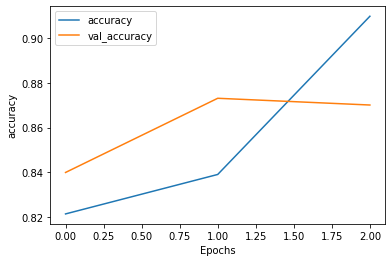

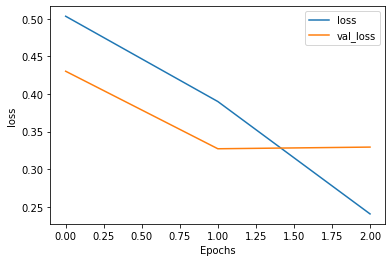

In [50]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [51]:
%%time
result = model.evaluate(x_test_pad, y_test)

52/52 [==============================] - 3s 54ms/step - loss: 0.3954 - accuracy: 0.8416
CPU times: user 2.81 s, sys: 55.1 ms, total: 2.87 s
Wall time: 2.89 s


In [52]:
print("Точность: {0:.2%}".format(result[1]))

Точность: 84.16%


In [53]:
positive_review='''Прогнозом поделился директор Департамента гидрологии РГП «Казгидромет» Адель Ахметов. Во время брифинга Региональной службы коммуникаций Алматы он подчеркнул, что в мегаполисе ожидается ранняя весна.

«В первой декаде марта ожидается повышение температуры воздуха до +2+7°С, днем до +10+15°С. В среднем температура воздуха ожидается выше климатической нормы на 1°С. Более детализированный прогноз на март 2023 года по городу Алматы будет выпущен 15 февраля и будет уточняться декадными и недельными прогнозами», - резюмировал Ахметов.'''

negative_review='''32-летнюю жительницу подозревают в продаже своих детей в Атырау, сообщает издание «Ақ Жайық»

Как пишет издание, дело касается двух малышей в возрасте одного года и двух лет.

Полицейские открыли досудебное расследование по статье УК РК «Торговля несовершеннолетними».'''

text=[positive_review,negative_review]

In [54]:
tokens = tokenizer.texts_to_sequences(text)

In [55]:
tokens

[[4065,
  101,
  142,
  2714,
  3657,
  93,
  48,
  6822,
  2827,
  395,
  1052,
  52,
  38,
  441,
  6,
  1,
  1154,
  678,
  1264,
  1154,
  662,
  8536,
  2996,
  18,
  3386,
  18,
  1,
  1136,
  8067,
  2996,
  1154,
  532,
  1845,
  3,
  40,
  1291,
  3,
  8429,
  8,
  4,
  3072,
  52,
  26,
  503,
  2,
  26,
  2,
  5006,
  3657],
 [7074,
  1,
  2920,
  369,
  248,
  1,
  1311,
  238,
  3458,
  17,
  1313,
  3458,
  414,
  644,
  314,
  1,
  3580,
  397,
  8,
  2,
  314,
  39,
  5185,
  3323,
  1630,
  861,
  4,
  994,
  2433,
  29]]

In [56]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens,
                           padding=pad, truncating='pre')

In [57]:
tokens_pad

array([[   0,    0,    0, ...,    2, 5006, 3657],
       [   0,    0,    0, ...,  994, 2433,   29]], dtype=int32)

In [58]:
tokens_pad.shape

(2, 1558)

In [59]:
a=model.predict(tokens_pad)[0]

1/1 [==============================] - 1s 873ms/step


In [60]:
b=model.predict(tokens_pad)[1]

1/1 [==============================] - 0s 55ms/step


In [61]:
print(a)
print(b)

[0.9299413]
[0.08072149]
